In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import scipy

In [4]:
#clist = sns.color_palette('Paired')
#clist = clist[:2] + clist[6:8]
clist = sns.color_palette('colorblind')[:2]
clist

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]

Loaded data/rmaps/35-0-0.0/fpautocorr.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0-shuffled/fpautocorr.npz --- Last modified at Thu May 23 11:55:26 2024
write out to images/presentation/ecdf/fpautocorr/35-0-0.0_shuffle.png

Loaded data/rmaps/35-0-0.0/fpautocorr.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0-permuted/fpautocorr.npz --- Last modified at Thu May 23 12:04:49 2024
write out to images/presentation/ecdf/fpautocorr/35-0-0.0_permute.png



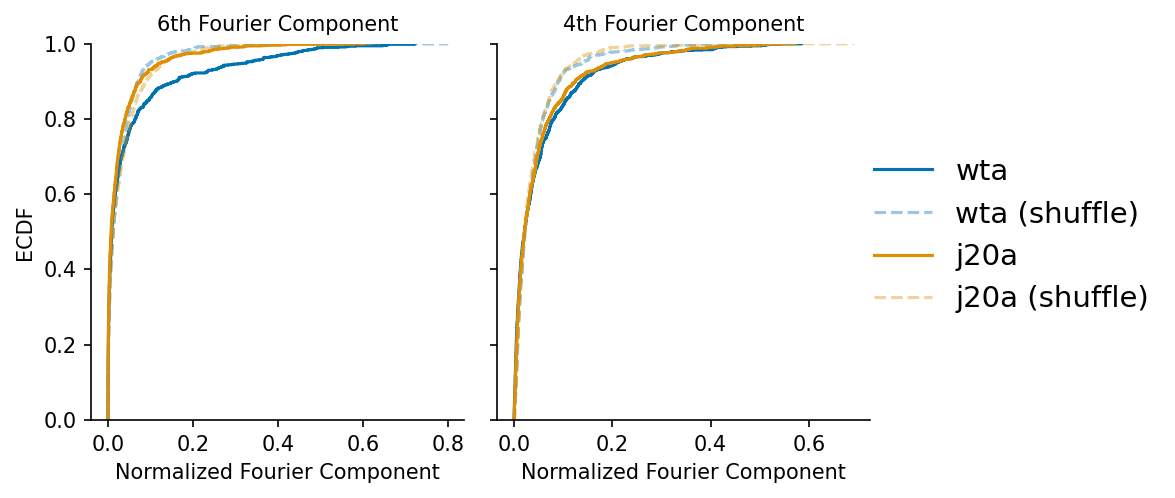

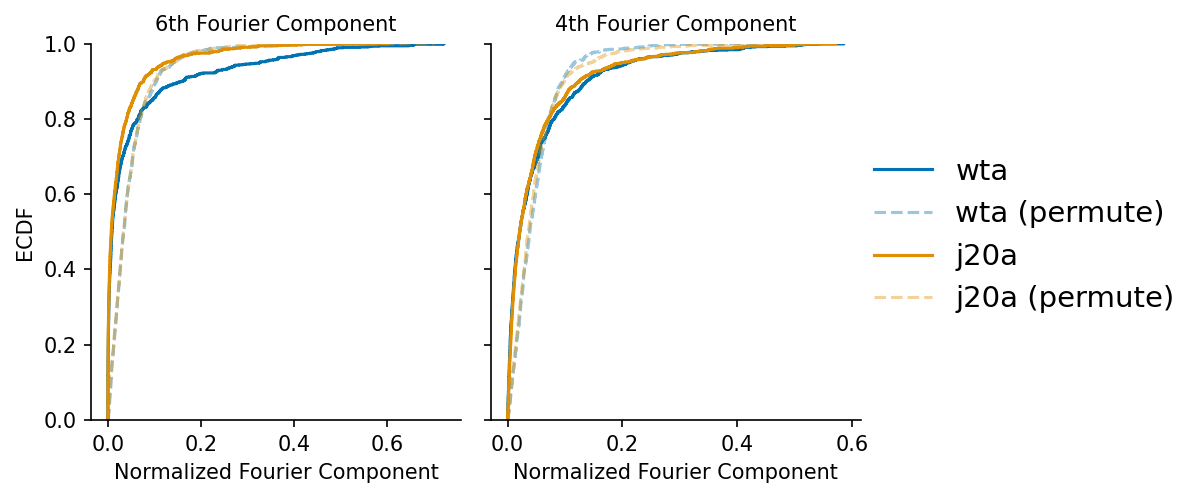

In [5]:
score_type = 'fpautocorr'
new = False
res, sigma, edge = 35, 0, 0.0
for shuffle_type in ['shuffle', 'permute']:
    run_ID = f'{res}-{sigma}-{edge}'
    fname = f'data/rmaps/{run_ID}/{score_type}_new.npz' if new else f'data/rmaps/{run_ID}/{score_type}.npz'
    print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
    score_orgnl = np.load(fname)

    if shuffle_type == 'shuffle':
        fname = f'data/rmaps/{run_ID}-shuffled/{score_type}_new.npz' if new else f'data/rmaps/{run_ID}-shuffled/{score_type}.npz'
    elif shuffle_type == 'permute':
        fname = f'data/rmaps/{run_ID}-permuted/{score_type}_new.npz' if new else f'data/rmaps/{run_ID}-permuted/{score_type}.npz'
    print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
    score_shfld = np.load(fname)

    angles = [6,4] if score_type.startswith('fp') else [60,90]
    fig, axs = plt.subplots(1,2, figsize=(6,3.6), dpi=150, sharey=True)
    for col, angle in enumerate(angles):
        ax = axs[col]
        if score_type.startswith('fp'):
            ax.set_title(f'{angle}th Fourier Component', fontsize=10)
        else:
            ax.set_title(f'Rotation by {angle}', fontsize=10)
        for i, gtype in enumerate(['wta','j20a']):
            data_orgnl = np.nan_to_num(score_orgnl[gtype])[:,angle]
            ax.ecdf(data_orgnl, color=clist[i], label=f'{gtype}')

            data_shfld = np.nan_to_num(score_shfld[gtype])[:,angle]
            ax.ecdf(data_shfld, color=clist[i], label=f'{gtype} ({shuffle_type})', alpha=0.4, linestyle='--')
            if score_type.startswith('fp'):
                ax.set_xlabel('Normalized Fourier Component', fontsize=10)
            else:
                ax.set_xlabel('Pearson Correlation', fontsize=10)
            if col==0:
                ax.set_ylabel('ECDF', fontsize=10)
            sns.despine(ax=ax)
        #ax.set_ylim(0.9,1.0)
        hans, labs = ax.get_legend_handles_labels()
    fig.legend(handles=hans, labels=labs, loc='center left', frameon=False, ncol=1, bbox_to_anchor=(0.95,0,1,1), fontsize=14)
    fig.tight_layout(rect=(0,0,1,0.95))
    figname = f'images/presentation/ecdf/{score_type}/{run_ID}_new_{shuffle_type}.png' if new else f'images/presentation/ecdf/{score_type}/{run_ID}_{shuffle_type}.png'
    #figname = f'images/presentation/ecdf/{score_type}/{run_ID}_noshuffle.png'
    fig.savefig(figname, bbox_inches='tight')
    print(f'write out to {figname}\n')

In [6]:
res, sigma, edge = 35, 0, 0.0
run_ID = f'{res}-{sigma}-{edge}'
for score_type, new in zip(['fpspeccorr', 'fpspeccorr', 'fpautocorr'],[False, True, False]):
    fname = f'data/rmaps/{run_ID}/{score_type}_new.npz' if new else f'data/rmaps/{run_ID}/{score_type}.npz'
    print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
    score_orgnl = np.load(fname)

    angles = [6,4] if score_type.startswith('fp') else [60,90]
    for angle in angles:
        print(score_type, angle, scipy.stats.mannwhitneyu(np.nan_to_num(score_orgnl['wta'])[:,angle],np.nan_to_num(score_orgnl['j20a'])[:,angle]))
        print(score_type, angle, scipy.stats.kstest(np.nan_to_num(score_orgnl['wta'])[:,angle],np.nan_to_num(score_orgnl['j20a'])[:,angle]))
        #print(score_type, angle, scipy.stats.mannwhitneyu(np.nan_to_num(score_orgnl['wta'])[:,angle],np.nan_to_num(score_orgnl['j20a'])[:,angle], alternative='greater'))
        #print(score_type, angle, scipy.stats.mannwhitneyu(np.nan_to_num(score_orgnl['wta'])[:,angle],np.nan_to_num(score_orgnl['j20a'])[:,angle], alternative='less'))
        print('')    
    print('\n')

Loaded data/rmaps/35-0-0.0/fpspeccorr.npz --- Last modified at Thu May 23 11:46:01 2024
fpspeccorr 6 MannwhitneyuResult(statistic=696253.0, pvalue=5.576815266469536e-06)
fpspeccorr 6 KstestResult(statistic=0.08488093299747468, pvalue=0.0006291447023790166, statistic_location=0.014151601716302599, statistic_sign=-1)

fpspeccorr 4 MannwhitneyuResult(statistic=502714.0, pvalue=8.158379528394542e-16)
fpspeccorr 4 KstestResult(statistic=0.15394346592088165, pvalue=6.254191834872218e-12, statistic_location=0.17205012044337278, statistic_sign=1)



Loaded data/rmaps/35-0-0.0/fpspeccorr_new.npz --- Last modified at Thu May 23 11:46:01 2024
fpspeccorr 6 MannwhitneyuResult(statistic=639987.0, pvalue=0.37855182959252176)
fpspeccorr 6 KstestResult(statistic=0.0715639137111424, pvalue=0.006425522951203084, statistic_location=0.12740071754956464, statistic_sign=-1)

fpspeccorr 4 MannwhitneyuResult(statistic=546619.0, pvalue=2.0485428747406465e-07)
fpspeccorr 4 KstestResult(statistic=0.11933278421081